# DATA SCIENCE ACADEMY (COMPFEST 12) - ELIMINATION

## Rubemsky:
##### &nbsp;&nbsp;&nbsp;&nbsp; - Muhammad Azis Husein
##### &nbsp;&nbsp;&nbsp;&nbsp; - Muhammad Mudrik
##### &nbsp;&nbsp;&nbsp;&nbsp; - Hanna Jannatuna'iim

# PETUNJUK PENGERJAAN
#### Dataset diambil dari:  https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv (dengan sedikit moifikasi)

### Keterangan:
##### &nbsp;&nbsp;&nbsp;&nbsp; Name - Nama merek dan model mobil
##### &nbsp;&nbsp;&nbsp;&nbsp; Location - Lokasi mobil dijual
##### &nbsp;&nbsp;&nbsp;&nbsp; Year - Tahun edisi mobil
##### &nbsp;&nbsp;&nbsp;&nbsp; Kilometers_Driven - Total jarak pemakaian mobil oleh pengguna sebelumnya dalam satuan kilometer
##### &nbsp;&nbsp;&nbsp;&nbsp; Fuel_Type - Tipe bahan bakar yang digunakan mobil (Petrol/Diesel/Electric/CNG/LPG)
##### &nbsp;&nbsp;&nbsp;&nbsp; Transmission - Tipe transmisi yang digunakan mobil (Automatic/Manual)
##### &nbsp;&nbsp;&nbsp;&nbsp; Owner_Type - Jenis kepemilikan mobil (First/Second/Third/Fourth & Above)
##### &nbsp;&nbsp;&nbsp;&nbsp; Mileage - Tingkat konsumsi bahan bakar dalam satuan kmpl atau km/kg
##### &nbsp;&nbsp;&nbsp;&nbsp; Engine - Kapasitas mesin mobil dalam satuan CC
##### &nbsp;&nbsp;&nbsp;&nbsp; Power - Tenaga maksimum dari mesin mobil dalam satuan bhp
##### &nbsp;&nbsp;&nbsp;&nbsp; Seats - Jumlah kursi pada mobil
##### &nbsp;&nbsp;&nbsp;&nbsp; Price - Harga mobil bekas dalam satuan INR Lakhs (Indian Rupee)

# SOAL

### 1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?
### 2. Kota apa yang memiliki mobil bekas paling banyak?
### 3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
### 4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
### 5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.
### 6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.
### 7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.
### 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
### 9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
### 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

## Import Module

In [258]:
import processor as pc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read Data

In [259]:
data = pc.read_data('used_car_data.csv')
data

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0          CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1       Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2       Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3       Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4       Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   
...        ...          ...        ...         ...      ...        ...    ...   
6014    Diesel       Manual      First   28.4 kmpl  1248 CC     74 bhp    5.0   
6015    Diesel       Manual      First   24.4 kmpl  1120 CC     71 bhp    5.0   
6016    Diesel       Manual     Second   14.0 kmpl  2498 CC    112 bhp    8.0   
6017    Petrol       Manual      First   18.9 kmpl   998 CC   67.1 bhp    5.0   
6018    Diesel       Manual      First  25.44 kmpl   936 CC   57.6 bhp    5.0   

      Price  
0      1.75  
1     12.50  
2      4.50  
3      6.00  
4     17.74  
...     ...  
6014   4.75  
6015   4.00  
6016   2.90  
6017   2.65  
6018   2.50  

[6019 rows x 12 columns]

## 1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut

In [260]:
merk = {}

data_merk = data[['Name']]

for name in data_merk.iterrows():
    name = name[1].array[0].split()[0]
    if name in merk:
        merk[name] += 1
    else:
        merk[name] = 1

data_merk = {'Merk' : [name for name in merk.keys()], 'Jumlah' : [jumlah for jumlah in merk.values()]}
data_merk = pd.DataFrame(data_merk)
data_merk = data_merk.sort_values('Jumlah', ascending = False)

data_merk

Merk  Jumlah
0          Maruti    1211
1         Hyundai    1107
2           Honda     608
5          Toyota     411
11  Mercedes-Benz     318
6      Volkswagen     315
14           Ford     300
13       Mahindra     272
12            BMW     267
3            Audi     236
7            Tata     186
20          Skoda     173
10        Renault     145
19      Chevrolet     121
4          Nissan      91
8            Land      60
17         Jaguar      40
22           Fiat      28
9      Mitsubishi      27
21           Mini      26
18          Volvo      21
15        Porsche      18
23           Jeep      15
16         Datsun      13
28          Force       3
27          ISUZU       2
24          Smart       1
25     Ambassador       1
26          Isuzu       1
29        Bentley       1
30    Lamborghini       1

### > Jumlah mobil untuk setap merek

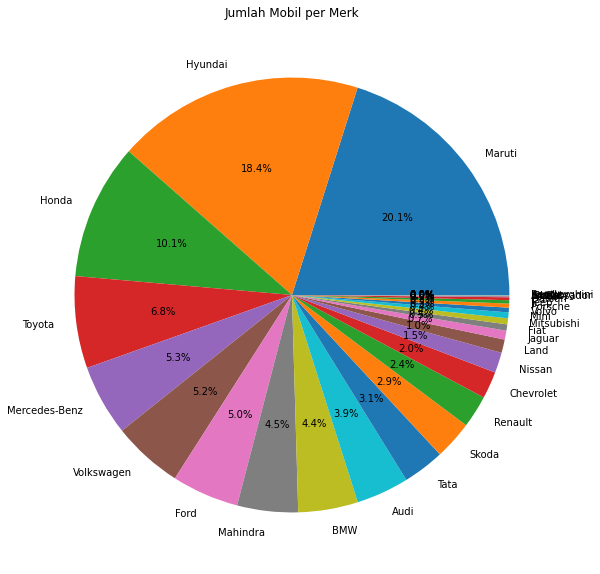

In [261]:
grafik_mobil_setiap_merek = pc.piechart2(data_merk['Jumlah'], data_merk['Merk'], 'Jumlah Mobil per Merk')

## 2. Kota yang memiliki mobil bekas paling banyak

In [262]:
data_kota = data[['Location']]
# data_kota = pc.filter_data_string(data_kota, 'ne', 'Owner_Type', 'First')

kota = {}

for name in data_kota.iterrows():
    name = name[1].array[0].split()[0]
    if name in kota:
        kota[name] += 1
    else:
        kota[name] = 1

data_kota = {'Kota' : [name for name in kota.keys()], 'Jumlah' : [jumlah for jumlah in kota.values()]}
data_kota = pd.DataFrame(data_kota)
data_kota = data_kota.sort_values('Jumlah', ascending = False)

data_kota

Kota  Jumlah
0       Mumbai     790
4    Hyderabad     742
6        Kochi     651
3   Coimbatore     636
1         Pune     622
8        Delhi     554
7      Kolkata     535
2      Chennai     494
5       Jaipur     413
9    Bangalore     358
10   Ahmedabad     224

### > Grafik mobil bekas di setiap kota 

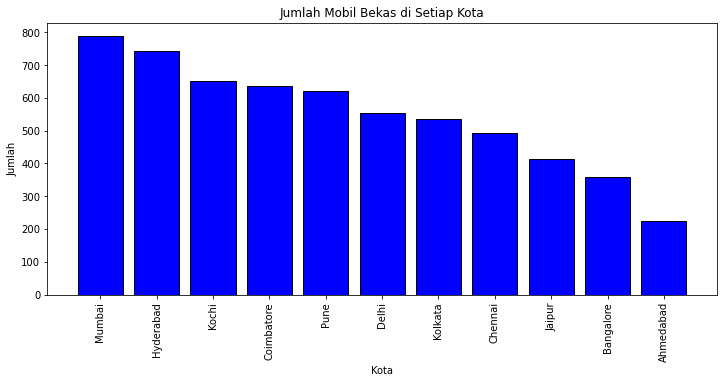

In [263]:
grafik_mobil_bekas_per_kota = pc.bar_chart(data_kota['Kota'], data_kota['Jumlah'], 'Jumlah Mobil Bekas di Setiap Kota', 'Kota', 'Jumlah')

## 3. Distribusi tahun mobil bekas

In [264]:
data_tahun_mobil_bekas = data[['Year']]
# data_tahun_mobil_bekas = pc.filter_data_string(data_tahun_mobil_bekas, 'ne', 'Owner_Type', 'First')
data_tahun_mobil_bekas

years = {}

for year in data_tahun_mobil_bekas.iterrows():
    year = year[1].array[0]

    if year in years:
        years[year] += 1
    else:
        years[year] = 1

data_years = {'Tahun' : [key for key in years.keys()], 'Jumlah' : [val for val in years.values()]}
data_years = pd.DataFrame(data_years)
data_years = data_years.sort_values('Jumlah', ascending = False)

data_years

Tahun  Jumlah
7    2014     797
1    2015     744
5    2016     741
4    2013     649
8    2017     587
3    2012     580
2    2011     466
0    2010     342
6    2018     298
10   2009     198
11   2008     174
9    2007     125
12   2019     102
13   2006      78
14   2005      57
15   2004      31
18   2003      17
16   2002      15
20   2001       8
17   2000       4
21   1998       4
19   1999       2

### > Grafik Distribusi Mobil Bekas per Tahun

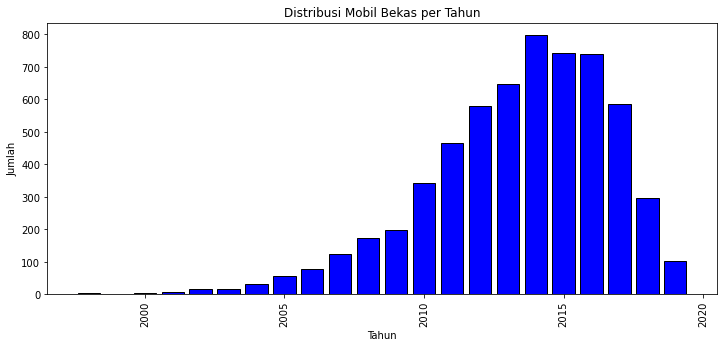

In [265]:
graph_distribusi_tahun = pc.bar_chart(data_years['Tahun'], data_years['Jumlah'], 'Distribusi Mobil Bekas per Tahun', 'Tahun', 'Jumlah')

## 4. Jumlah Mobil dengan total jarak pemakaian kurang dari 100.000 Km

In [266]:
data_jarak_mobil = data[['Kilometers_Driven']]
data_jarak_mobil = pc.filter_data_integer(data_jarak_mobil, 'lt', 'Kilometers_Driven', 100000)
data_jarak_mobil = data_jarak_mobil.sort_values('Kilometers_Driven')

jumlah_mobil = data_jarak_mobil.count().array[0]
df = {'Jumlah Mobil dengan total jarak pemakaian kurang dari 100.000 km': [jumlah_mobil]}
df = pd.DataFrame(df)

df

Jumlah Mobil dengan total jarak pemakaian kurang dari 100.000 km
0                                               5470

## 5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi

In [267]:
data_jarak_mobil = data[['Kilometers_Driven']]
data_jarak_mobil = data_jarak_mobil.sort_values('Kilometers_Driven', ascending = False)
df = pd.DataFrame(data_jarak_mobil)

Q3, Q2, Q1 = df.Kilometers_Driven.quantile([.75, .5, .25], interpolation = 'higher')
IQR = Q3 - Q1
RUB = Q3 + (1.5 * IQR)
RLB = Q1 - (1.5 * IQR)

batas = {'Reasonable Lower Boundary' : [RLB], 'First Quartile' : [Q1], 'Median' : [Q2], 'Third Quartile' : [Q3], 'Reasonable Upper Boundary' : [RUB]}
batas = pd.DataFrame(batas)

batas

Reasonable Lower Boundary  First Quartile  Median  Third Quartile  \
0                   -24500.0           34000   53000           73000   

   Reasonable Upper Boundary  
0                   131500.0

### Argumen
blah blah

## 6. Apakah terdapat outlier pada kolom Kilometers_Driven?

In [268]:
data_jarak_mobil = data[['Kilometers_Driven']]
upper_outlier = pc.filter_data_integer(data_jarak_mobil, 'gt', 'Kilometers_Driven', 131500)
lower_outlier = pc.filter_data_integer(data_jarak_mobil, 'lt', 'Kilometers_Driven', -24500)

outlier = []
for val in upper_outlier.iterrows() :
    outlier.append(val)

for val in lower_outlier.iterrows() :
    outlier.append(val)

data_outlier = {'Outlier' : [val[1].Kilometers_Driven for val in outlier]}
data_outlier = pd.DataFrame(data_outlier)

data_outlier

Outlier
0     262000
1     178000
2     230000
3     136997
4     147898
..       ...
197   192000
198   180000
199   132000
200   140000
201   186679

[202 rows x 1 columns]

### > Boxplot Kilometers_Driven

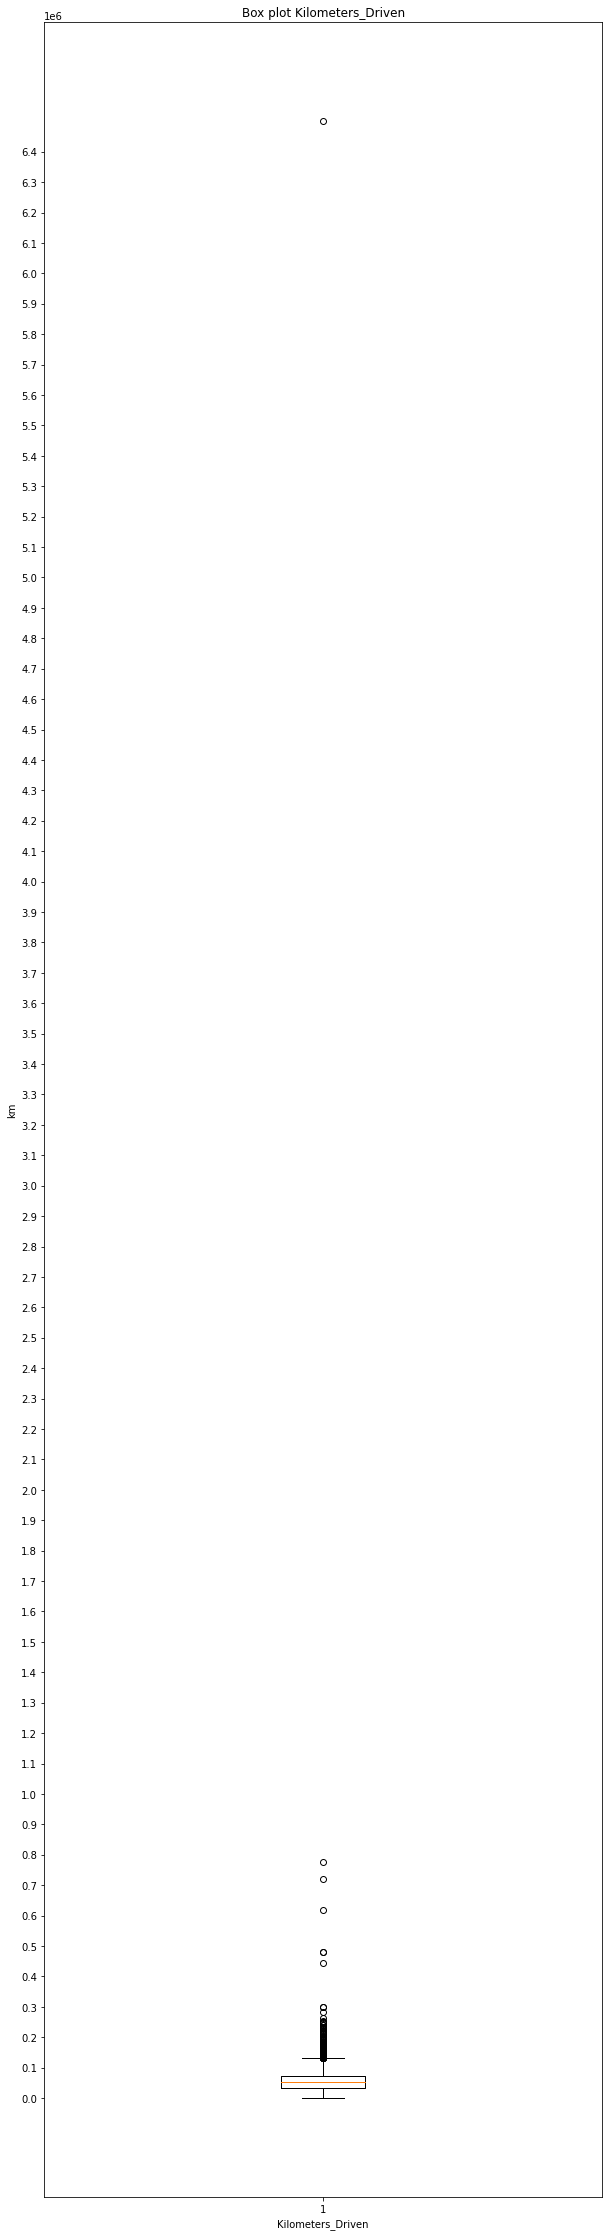

In [269]:
boxplot_kilometers_driven = pc.boxplot(data_jarak_mobil['Kilometers_Driven'], 'Box plot Kilometers_Driven', 'Kilometers_Driven', 'km')

## 7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian

In [270]:
data_year_Kilometers_Driven = data[['Year', 'Kilometers_Driven']]
data_year_Kilometers_Driven = pd.DataFrame(data_year_Kilometers_Driven)
corrMatrix = data_year_Kilometers_Driven.corr()

corrMatrix

Year  Kilometers_Driven
Year               1.000000          -0.173048
Kilometers_Driven -0.173048           1.000000

### > Scatter plot korelasi tahun dengan total jarak pemakaian

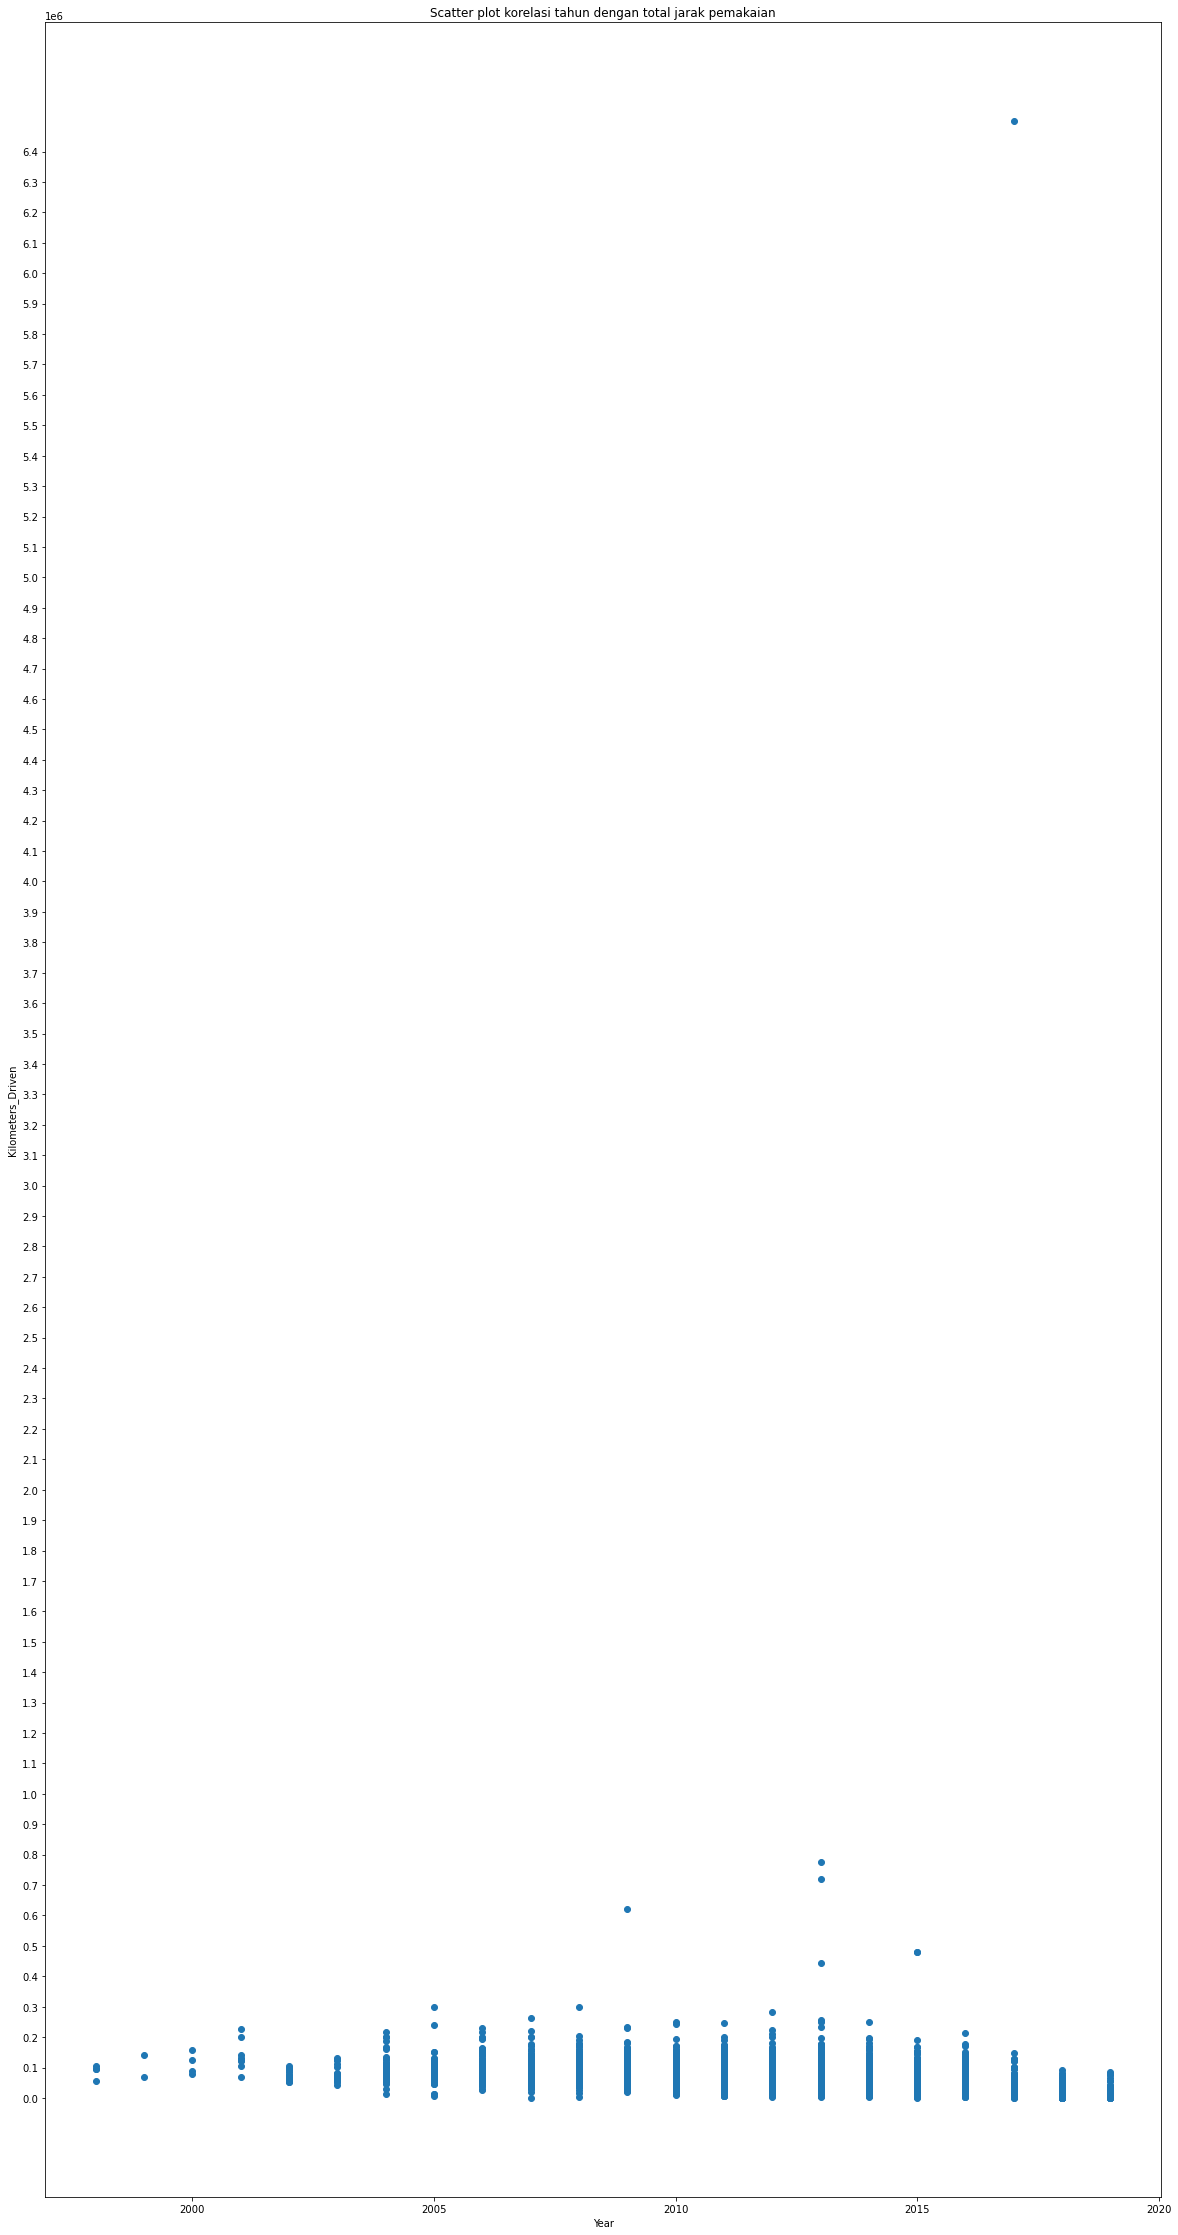

In [271]:
scatter_plot = pc.scatterplot('Scatter plot korelasi tahun dengan total jarak pemakaian', data_year_Kilometers_Driven['Year'], data_year_Kilometers_Driven['Kilometers_Driven'], 'Year', 'Kilometers_Driven')

### Argumen

## 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

In [272]:
#Code
data_kepemilikan = data[['Owner_Type']]
data_kepemilikan_1 = pc.filter_data_string(data_kepemilikan, 'eq', 'Owner_Type', 'First')
data_kepemilikan_2 = pc.filter_data_string(data_kepemilikan, 'eq', 'Owner_Type', 'Second')
data_kepemilikan_3 = pc.filter_data_string(data_kepemilikan, 'eq', 'Owner_Type', 'Third')
data_kepemilikan_4 = pc.filter_data_string(data_kepemilikan, 'sw', 'Owner_Type', 'Fourth') 

result_third_and_more = data_kepemilikan_3.count() + data_kepemilikan_4.count()
result_third_and_more[0]

122

###  Grafik Distribusi Jenis Kepemilikan Mobil Grafik Distribusi Jenis Kepemilikan Mobil

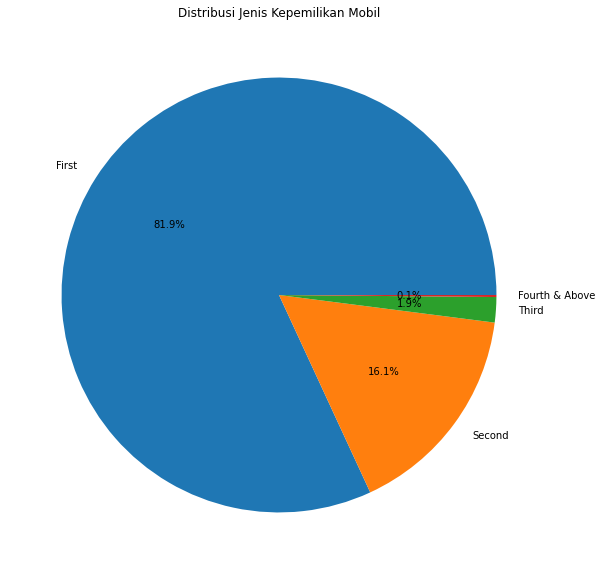

In [273]:
data_milik = {'Kepemilikan':['First', 'Second', 'Third', 'Fourth & Above'] , 
              'Jumlah':[data_kepemilikan_1.count()[0], 
                        data_kepemilikan_2.count()[0], 
                        data_kepemilikan_3.count()[0], 
                        data_kepemilikan_4.count()[0]]}
data_milik = pd.DataFrame(data_milik)
# graph_distribusi_kepemilikan = pc.bar_chart(data_milik['Kepemilikan'], data_milik['Jumlah'], 'Distribusi Jenis Kepemilikan Mobil', 'Jenis Kepemilikan', 'Jumlah')
asd = pc.piechart2(data_milik['Jumlah'], data_milik['Kepemilikan'], 'Distribusi Jenis Kepemilikan Mobil')

## 9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

In [274]:
#Code
#Code
# Asumsi 
# kmpl = KM/L
# KM/Kg = KM/L (1 Kg = 1 L)

raw_jenis_bensin = data[['Fuel_Type']]
raw_mileage = data[['Mileage']]
data_bensin = {'Fuel':[mew for mew in raw_jenis_bensin['Fuel_Type']],
               'Mileage': [float(str(sin).split()[0]) for sin in raw_mileage['Mileage']]}
data_bensin = pd.DataFrame(data_bensin)

jumlah_per_jenis = {}
for name in raw_jenis_bensin.iterrows():
    name = name[1].array[0].split()[0]
    if name in jumlah_per_jenis:
        jumlah_per_jenis[name] += 1
    else:
        jumlah_per_jenis[name] = 1

rerata = {}
for name in jumlah_per_jenis.keys():
    rerata[name] = data_bensin.loc[data_bensin['Fuel']==name]['Mileage'].sum(axis=0) / jumlah_per_jenis[name]
rerata

rerata["Diesel"] = rerata["Diesel"] / 0.832
rerata["Petrol"] = rerata["Petrol"] / 0.755


hasil = {'Fuel':[bahan for bahan in rerata.keys()], 'Mileage':[efisi for efisi in rerata.values()]}
hasil = pd.DataFrame(hasil)
hasil = hasil.sort_values('Mileage', ascending = False)
hasil

Fuel    Mileage
0       CNG  25.418036
2    Petrol  23.066495
1    Diesel  22.380389
3       LPG  19.385000
4  Electric   0.000000

###  Grafik efisiensi konsumsi bahan bakar berdasarkan jenis

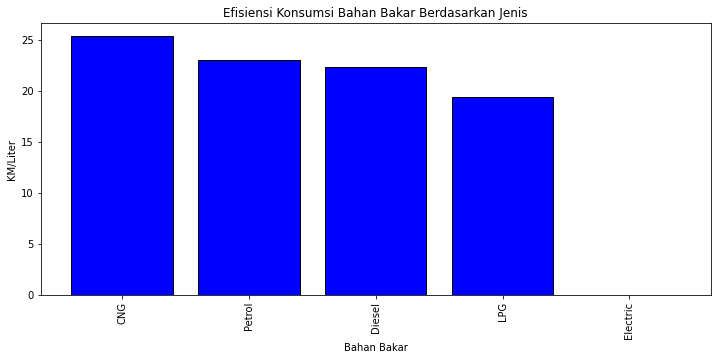

In [275]:
graph_efisiensi_bahan_bakar = pc.bar_chart(hasil['Fuel'], hasil['Mileage'], 'Efisiensi Konsumsi Bahan Bakar Berdasarkan Jenis', 'Bahan Bakar', 'KM/Liter')

## 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India?

In [276]:
#Code

raw_tahun = data[['Year']]
raw_km_driven = data[['Kilometers_Driven']]
# Fuel_Type
# Transmission
# Owner_Type
raw_owner = data[['Owner_Type']]
temp_owner = []
for ow in raw_owner['Owner_Type']:
    if ow == 'First':
        temp_owner.append(4)
    elif ow == 'Second':
        temp_owner.append(3)
    elif ow =='Third':
        temp_owner.append(2)
    else:
        temp_owner.append(1)
len(temp_owner)
raw_jenis_bensin = data[['Fuel_Type']]
raw_mileage = data[['Mileage']]

temp_mileage = []
counter = 0
for sin in raw_mileage['Mileage']:
    sin = float(str(sin).split()[0])
    if raw_fuel_type.iloc[counter]['Fuel_Type'] == 'Diesel':
       sin = sin / 0.832
    elif raw_fuel_type.iloc[counter]['Fuel_Type'] == 'Petrol':
        sin = sin / 0.755
    temp_mileage.append(sin)
    counter+=1

raw_engine = data[['Engine']]
raw_power = data[['Power']]
raw_seat = data[['Seats']]
raw_price = data[['Price']]


data_temp = {   'Year' : [yea for yea in raw_tahun['Year']],
                'Kilometers_Driven' : [km for km in raw_km_driven['Kilometers_Driven']],
                'Owner_Type' : temp_owner,
                'Fuel' : [mew for mew in raw_jenis_bensin['Fuel_Type']],
                'Mileage' : temp_mileage,
                'Engine' : [float(str(eng).split()[0]) for eng in raw_engine['Engine']],
                'Power' : [float(str(pow).split()[0]) if str(pow).split()[0] != 'null' else 0  for pow in raw_power['Power']],
                'Seat' : [sea for sea in raw_seat['Seats']],
                'Price': [pri for pri in raw_price['Price']]
               }
data_temp = pd.DataFrame(data_temp)
corrMatrix = data_temp.corr()
corrMatrix

Year  Kilometers_Driven  Owner_Type   Mileage  \
Year               1.000000          -0.173048    0.397152  0.309769   
Kilometers_Driven -0.173048           1.000000   -0.085337 -0.087460   
Owner_Type         0.397152          -0.085337    1.000000  0.157807   
Mileage            0.309769          -0.087460    0.157807  1.000000   
Engine            -0.052197           0.091068   -0.050907 -0.677726   
Power              0.071181           0.024208   -0.000021 -0.503957   
Seat               0.012333           0.083113   -0.014052 -0.359176   
Price              0.305327          -0.011493    0.097557 -0.361901   

                     Engine     Power      Seat     Price  
Year              -0.052197  0.071181  0.012333  0.305327  
Kilometers_Driven  0.091068  0.024208  0.083113 -0.011493  
Owner_Type        -0.050907 -0.000021 -0.014052  0.097557  
Mileage           -0.677726 -0.503957 -0.359176 -0.361901  
Engine             1.000000  0.840934  0.393337  0.658354  
Power              0.840934  1.000000  0.108730  0.759136  
Seat               0.393337  0.108730  1.000000  0.052225  
Price              0.658354  0.759136  0.052225  1.000000

In [277]:
raw_transmission = data[['Transmission', 'Price']]
raw_manual = pc.filter_data_string(raw_transmission, 'eq', 'Transmission', 'Manual')
raw_matic = pc.filter_data_string(raw_transmission, 'eq', 'Transmission', 'Automatic')

manual_mean = raw_manual.mean()
matic_mean = raw_matic.mean()

print('Mean Price of Manual Transmission:')
print(manual_mean)
print('-------------------------------')
print('Mean Price of Automatic Transmission:')
print(matic_mean)
print('-------------------------------')
print('Conclusion:')
print('Automatic car is more expensive than manual car')


Mean Price of Manual Transmission:
Price    5.332703
dtype: float64
-------------------------------
Mean Price of Automatic Transmission:
Price    19.843971
dtype: float64
-------------------------------
Conclusion:
Automatic car is more expensive than manual car


In [278]:
df_transmission = {'Transmission' : ['Manual', 'Automatic'], 'Price Mean' : [float(manual_mean.array[0]), float(matic_mean.array[0])]}

df_transmission = pd.DataFrame(df_transmission)

df_transmission

Transmission  Price Mean
0       Manual    5.332703
1    Automatic   19.843971

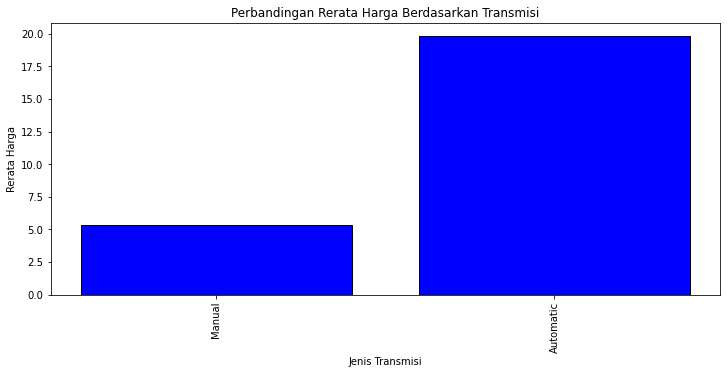

In [279]:
pc.bar_chart(df_transmission['Transmission'], df_transmission['Price Mean'], 'Perbandingan Rerata Harga Berdasarkan Transmisi', 'Jenis Transmisi', 'Rerata Harga')

In [280]:
raw_fuel_type = data[['Fuel_Type', 'Price']]
raw_petrol = pc.filter_data_string(raw_fuel_type, 'eq', 'Fuel_Type', 'Petrol')
raw_diesel = pc.filter_data_string(raw_fuel_type, 'eq', 'Fuel_Type', 'Diesel')
raw_electric = pc.filter_data_string(raw_fuel_type, 'eq', 'Fuel_Type', 'Electric')
raw_cng = pc.filter_data_string(raw_fuel_type, 'eq', 'Fuel_Type', 'CNG')
raw_lpg = pc.filter_data_string(raw_fuel_type, 'eq', 'Fuel_Type', 'LPG')

fuel_mean = [raw_petrol.mean(), raw_diesel.mean(), raw_electric.mean(), raw_cng.mean(), raw_lpg.mean()]
title = ['Petrol', 'Diesel', 'Electric', 'CNG', 'LPG']

for i in range(len(fuel_mean)):
    print('Mean Price of {} Fuel Type'.format(title[i]))
    print(fuel_mean[i])
    print('-----------------------------------')
print('Conclusion:')
print('Electric car is the most expensive car and LPG car is the cheapest car')

Mean Price of Petrol Fuel Type
Price    5.7011
dtype: float64
-----------------------------------
Mean Price of Diesel Fuel Type
Price    12.840605
dtype: float64
-----------------------------------
Mean Price of Electric Fuel Type
Price    12.875
dtype: float64
-----------------------------------
Mean Price of CNG Fuel Type
Price    3.516786
dtype: float64
-----------------------------------
Mean Price of LPG Fuel Type
Price    2.487
dtype: float64
-----------------------------------
Conclusion:
Electric car is the most expensive car and LPG car is the cheapest car


In [281]:
df_fuel_type = {'Fuel Type' : [name for name in title], 'Price Mean' : [float(mean.array[0]) for mean in fuel_mean]}
df_fuel_type = pd.DataFrame(df_fuel_type)
df_fuel_type = df_fuel_type.sort_values('Price Mean')

df_fuel_type

Fuel Type  Price Mean
4       LPG    2.487000
3       CNG    3.516786
0    Petrol    5.701100
1    Diesel   12.840605
2  Electric   12.875000

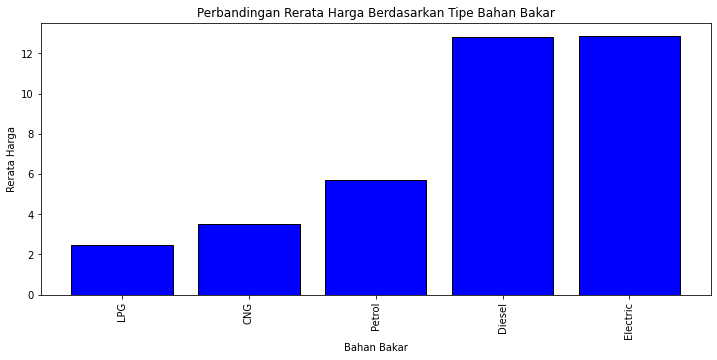

In [282]:
pc.bar_chart(df_fuel_type['Fuel Type'], df_fuel_type['Price Mean'], 'Perbandingan Rerata Harga Berdasarkan Tipe Bahan Bakar', 'Bahan Bakar', 'Rerata Harga')

In [283]:
data_temp_2 = { 'Name' : [name for name in data['Name']],
                'Year' : [yea for yea in raw_tahun['Year']],
                'Kilometers_Driven' : [km for km in raw_km_driven['Kilometers_Driven']],
                'Owner_Type' : temp_owner,
                'Fuel' : [mew for mew in raw_jenis_bensin['Fuel_Type']],
                'Mileage' : [float(str(sin).split()[0]) for sin in raw_mileage['Mileage']],
                'Engine' : [float(str(eng).split()[0]) for eng in raw_engine['Engine']],
                'Power' : [float(str(pow).split()[0]) if str(pow).split()[0] != 'null' else 0  for pow in raw_power['Power']],
                'Seat' : [sea for sea in raw_seat['Seats']],
                'Price': [pri for pri in raw_price['Price']]
               }
data_temp_2 = pd.DataFrame(data_temp_2)

data_temp_2

Name  Year  Kilometers_Driven  Owner_Type  \
0               Maruti Wagon R LXI CNG  2010              72000           4   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000           4   
2                         Honda Jazz V  2011              46000           4   
3                    Maruti Ertiga VDI  2012              87000           4   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670           3   
...                                ...   ...                ...         ...   
6014                  Maruti Swift VDI  2014              27365           4   
6015          Hyundai Xcent 1.1 CRDi S  2015             100000           4   
6016             Mahindra Xylo D4 BSIV  2012              55000           3   
6017                Maruti Wagon R VXI  2013              46000           4   
6018             Chevrolet Beat Diesel  2011              47000           4   

        Fuel  Mileage  Engine   Power  Seat  Price  
0        CNG    26.60   998.0   58.16   5.0   1.75  
1     Diesel    19.67  1582.0  126.20   5.0  12.50  
2     Petrol    18.20  1199.0   88.70   5.0   4.50  
3     Diesel    20.77  1248.0   88.76   7.0   6.00  
4     Diesel    15.20  1968.0  140.80   5.0  17.74  
...      ...      ...     ...     ...   ...    ...  
6014  Diesel    28.40  1248.0   74.00   5.0   4.75  
6015  Diesel    24.40  1120.0   71.00   5.0   4.00  
6016  Diesel    14.00  2498.0  112.00   8.0   2.90  
6017  Petrol    18.90   998.0   67.10   5.0   2.65  
6018  Diesel    25.44   936.0   57.60   5.0   2.50  

[6019 rows x 10 columns]

In [284]:
data_analysis_1 = data_temp_2.sort_values('Engine', ascending = False)
data_analysis_1 = data_analysis_1[:30]
data_analysis_1

Name  Year  \
5521                  Bentley Continental Flying Spur  2006   
152             Mercedes-Benz S Class 2005 2013 S 500  2010   
4691                   Mercedes-Benz SLK-Class 55 AMG  2014   
4722                    Mercedes-Benz SL-Class SL 500  2010   
5781                       Lamborghini Gallardo Coupe  2011   
5919                           Jaguar F Type 5.0 V8 S  2015   
5088                  Jaguar XJ 5.0 L V8 Supercharged  2011   
4451                                  Ford Mustang V8  2018   
2100                          Porsche Cayenne Turbo S  2010   
2978                    Porsche Panamera 2010 2013 4S  2010   
5603                Porsche Panamera 2010 2013 Diesel  2013   
70                    Porsche Cayenne 2009-2014 Turbo  2008   
4821                          BMW 6 Series 630i Coupe  2011   
3341                     BMW 7 Series 2007-2012 750Li  2010   
4627                          BMW 6 Series 650i Coupe  2010   
1038             Land Rover Range Rover TDV8 (Diesel)  2011   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8  2012   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel  2012   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8  2013   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE  2012   
5341                         Porsche Cayenne S Diesel  2016   
4938               Audi Q7 4.2 TDI Quattro Technology  2015   
586                Audi Q7 4.2 TDI Quattro Technology  2014   
4388               Audi Q7 4.2 TDI Quattro Technology  2015   
459                Audi Q7 4.2 TDI Quattro Technology  2016   
1093               Audi Q7 4.2 TDI Quattro Technology  2014   
4559               Audi Q7 4.2 TDI Quattro Technology  2010   
1596                          Audi Q7 4.2 FSI quattro  2008   
2681                          Skoda Superb 3.6 V6 FSI  2010   
6011                          Skoda Superb 3.6 V6 FSI  2009   

      Kilometers_Driven  Owner_Type    Fuel  Mileage  Engine  Power  Seat  \
5521              48000           4  Petrol     8.60  5998.0  552.0   4.0   
152               35277           4  Petrol     7.81  5461.0  362.9   5.0   
4691               3000           3  Petrol    12.00  5461.0  421.0   2.0   
4722              35000           4  Petrol     8.10  5461.0  387.3   2.0   
5781               6500           2  Petrol     6.40  5204.0  560.0   2.0   
5919               8000           4  Petrol    12.50  5000.0  488.1   2.0   
5088              43686           4  Petrol    10.50  5000.0  503.0   4.0   
4451              21290           4  Petrol    13.00  4951.0  395.0   4.0   
2100              35000           3  Petrol    11.90  4806.0  550.0   5.0   
2978              42400           2  Petrol     8.00  4806.0  394.3   4.0   
5603              36400           4  Diesel     7.50  4806.0  394.3   4.0   
70                73000           4  Petrol     8.50  4806.0  500.0   5.0   
4821               5900           4  Petrol     7.94  4395.0  450.0   4.0   
3341              50161           4  Petrol     8.77  4395.0  402.0   5.0   
4627              65329           4  Petrol     7.94  4395.0  450.0   4.0   
1038              55000           4  Diesel    10.20  4367.0  308.0   7.0   
3242              63000           3  Diesel    11.49  4367.0  335.3   5.0   
1352              66538           4  Diesel    10.20  4367.0  308.0   7.0   
5416              75995           3  Diesel    11.49  4367.0  335.3   5.0   
4869              84384           4  Diesel    10.20  4367.0  308.0   7.0   
5341              65003           4  Diesel    13.60  4134.0  382.0   5.0   
4938              56238           4  Diesel    11.33  4134.0  335.2   7.0   
586               79926           4  Diesel    11.33  4134.0  335.2   7.0   
4388              50000           4  Diesel    11.33  4134.0  335.2   7.0   
459               51002           4  Diesel    11.33  4134.0  335.2   7.0   
1093              50000           4  Diesel    11.33  4134.0  335.2   7.0   
4559            

In [285]:
data_analysis_2 = data_temp_2.sort_values('Power', ascending = False)
data_analysis_2 = data_analysis_2[:30]
data_analysis_2

Name  Year  Kilometers_Driven  \
5781                Lamborghini Gallardo Coupe  2011               6500   
5521           Bentley Continental Flying Spur  2006              48000   
2100                   Porsche Cayenne Turbo S  2010              35000   
5088           Jaguar XJ 5.0 L V8 Supercharged  2011              43686   
70             Porsche Cayenne 2009-2014 Turbo  2008              73000   
5919                    Jaguar F Type 5.0 V8 S  2015               8000   
4627                   BMW 6 Series 650i Coupe  2010              65329   
4821                   BMW 6 Series 630i Coupe  2011               5900   
4061                            Audi RS5 Coupe  2013              23312   
148                             Audi RS5 Coupe  2013              23000   
4691            Mercedes-Benz SLK-Class 55 AMG  2014               3000   
3341              BMW 7 Series 2007-2012 750Li  2010              50161   
4451                           Ford Mustang V8  2018              21290   
2978             Porsche Panamera 2010 2013 4S  2010              42400   
5603         Porsche Panamera 2010 2013 Diesel  2013              36400   
4722             Mercedes-Benz SL-Class SL 500  2010              35000   
5341                  Porsche Cayenne S Diesel  2016              65003   
418             Mercedes-Benz GLC 43 AMG Coupe  2018              22397   
589    Mercedes-Benz S Class 2005 2013 S 350 L  2006              47088   
1930   Mercedes-Benz S Class 2005 2013 S 350 L  2007              55000   
4342   Mercedes-Benz S Class 2005 2013 S 350 L  2006             103000   
152      Mercedes-Benz S Class 2005 2013 S 500  2010              35277   
134                   Mercedes-Benz SLC 43 AMG  2017              13372   
2095                  Mercedes-Benz SLC 43 AMG  2019               2526   
3132                      Porsche Cayenne Base  2019              14298   
5416  Land Rover Range Rover Vogue SE 4.4 SDV8  2013              75995   
3242  Land Rover Range Rover Vogue SE 4.4 SDV8  2012              63000   
1093        Audi Q7 4.2 TDI Quattro Technology  2014              50000   
4388        Audi Q7 4.2 TDI Quattro Technology  2015              50000   
4938        Audi Q7 4.2 TDI Quattro Technology  2015              56238   

      Owner_Type    Fuel  Mileage  Engine   Power  Seat   Price  
5781           2  Petrol     6.40  5204.0  560.00   2.0  120.00  
5521           4  Petrol     8.60  5998.0  552.00   4.0   59.00  
2100           3  Petrol    11.90  4806.0  550.00   5.0   32.00  
5088           4  Petrol    10.50  5000.0  503.00   4.0   50.66  
70             4  Petrol     8.50  4806.0  500.00   5.0   14.50  
5919           4  Petrol    12.50  5000.0  488.10   2.0  100.00  
4627           4  Petrol     7.94  4395.0  450.00   4.0   20.72  
4821           4  Petrol     7.94  4395.0  450.00   4.0   47.50  
4061           4  Petrol    11.05  2894.0  444.00   4.0   40.50  
148            4  Petrol    11.05  2894.0  444.00   4.0   37.00  
4691           3  Petrol    12.00  5461.0  421.00   2.0   90.00  
3341           4  Petrol     8.77  4395.0  402.00   5.0   25.93  
4451           4  Petrol    13.00  4951.0  395.00   4.0   56.80  
2978           2  Petrol     8.00  4806.0  394.30   4.0   42.91  
5603           4  Diesel     7.50  4806.0  394.30   4.0   72.00  
4722           4  Petrol     8.10  5461.0  387.30   2.0   29.50  
5341           4  Diesel    13.60  4134.0  382.00   5.0   67.83  
418            4  Petrol    11.50  2996.0  367.00   5.0   70.99  
589            3  Petrol    10.13  3498.0  364.90   5.0   19.00  
1930           2  Petrol    10.13  3498.0  364.90   5.0    9.99  
4342           4  Petrol    10.13  3498.0  364.90   5.0    8.85  
152            4  Petrol     7.81  5461.0  362.90   5.0   30.00  
134            4  Petrol    19.00  2996.0  362.07   2.0   54.00  
2095           4  Petrol    19.00  2996.0  362.07   2.0   83.96  
3132           4  Petrol    13.33  2995.0  340.00   5.0    2.02  


### Efisiensi berdasarkan jenis transmisi mobil

In [286]:
raw_efisiensi = { 'Transmission' : [tr for tr in data['Transmission']],
                'Mileage' : [float(str(sin).split()[0]) for sin in raw_mileage['Mileage']],
               }
raw_efisiensi = pd.DataFrame(raw_efisiensi)
raw_efisiensi

raw_manual = raw_efisiensi.loc[raw_efisiensi['Transmission']=='Manual']
raw_manual

raw_matic = raw_matic.loc[raw_efisiensi['Transmission']=='Automatic']
# raw_matic.mean()

mean_manual = raw_manual.mean()
mean_matic = raw_matic.mean()

res_efficiency = {  'Transmission' : ['Manual', 'Automatic'], 
                    'Mileage Mean' : [mean_manual[0], mean_matic[0]]
                 }

res_efficiency = pd.DataFrame(res_efficiency)

res_efficiency


Transmission  Mileage Mean
0       Manual     19.100177
1    Automatic     19.843971

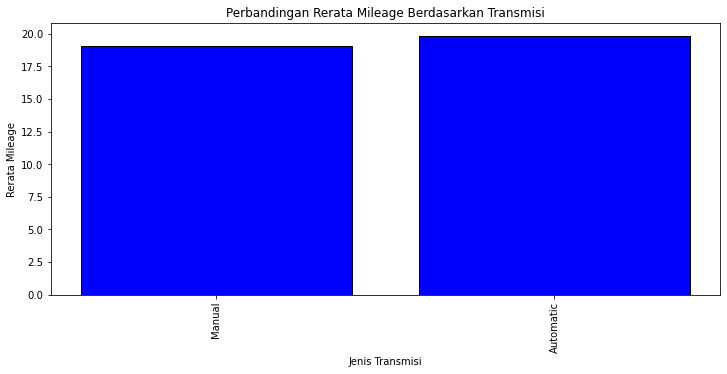

In [287]:
pc.bar_chart(res_efficiency['Transmission'], res_efficiency['Mileage Mean'], 'Perbandingan Rerata Mileage Berdasarkan Transmisi', 'Jenis Transmisi', 'Rerata Mileage')

## KESIMPULAN

##### Dari dataset di atas. Kita dapat melihat correlation terkuat adalah antara Engine dan Power. Maka untuk merekomendasikan mobil yang cocok untuk dibeli, kami membuat perbandingan mobil dengan Engine terbaik dan mobil dengan Power terbaik. Dari perbandingan tersebut, kami menemukan Bentley Continental Flying Spur adalah mobil yang paling kami rekomendasikan karena mobil tersebut merupakan mobil dengan Engine paling baik dan Power peringkat kedua terbaik.